In [23]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import optimize as opt
from scipy import constants
from math import *

plt.rcParams.update({'font.size': 12})


#outdated values, -g flags and johnnies computer
#mmups = {"threeDim": [0.3189214840819909, 0.34509033084500196, 0.34572790936950293, 0.31731445354643323, 0.2243871090503399],
#        "twoDim": [0.4953712510303722, 0.8247776399482699, 1.2039257611218661, 1.542886060950171, 1.3951671410234947], #no, this is no measuring error, probably too small sample
#        "oneDim": [0.290583468357785, 0.47460124003811993, 0.7166321727714172, 0.8368761088608443, 1.02], #made up values to test functionality of graphs, replacing them atm
#        "twoDim-roundRobin": [0.49958634250840306, 0.5163987589905024, 0.5307742935394153, 0.5263335186027318, 0.5],  #TODO: last value!!
#        "threeDim-roundRobin": [0.00001]    #dummy value 
#}

#numThreadsUsed
xValues=[1, 2, 4, 8, 16]
no_omp_sample = [0.5421347096326495, 0.5304054950009283, 0.5429412211833946, 0.543776747018744, 0.53950236302035]
mmups_singleThread = sum(no_omp_sample) / len(no_omp_sample) #TODO: get value

#yValues, no padding
mmups = {"threeDim": [0.4197077994300368, 0.6017028189777069, 1.1911852293031566, 2.4409890887787733, 2.2843567251461985],
        "twoDim": [0.6574665185175445, 1.2397104036497073, 2.2606022244325885, 3.5004200504060488, 2.737101409607226], #no, this is no measuring error, probably too small sample
        "oneDim": [0.4149928621227715, 0.7651050871837246, 1.4404033129276197, 2.326717699341539, 2.117432824443645], #made up values to test functionality of graphs, replacing them atm
        "twoDim-roundRobin": [0.659452258953713, 1.1341983486072045, 1.5795542497907091, 1.6348417473188595, 1.4390973981119042],  #TODO: last value!!
        "threeDim-roundRobin": [0.6583668551790429, 1.1274211368914744, 1.5792299674678627, 1.6314012104996982, 1.446968600781363]    #dummy value 
}

mmupsPadding = {"twoDim": [0.6290495061961376, 1.1793982710021347, 2.045031595738154, 3.029476809355024, 2.376538808878749],
                "twoDim-roundRobin": [0.6232626553482169, 1.0648833420298807, 1.452411729677129, 1.491958344523021, 1.2987350320787552]}

speedUpsNoOmpComp = {}
speedUpsSingleTComp = {}

#initialize speedup data
for k in mmups.keys():
    noOmpEntry = []
    singleTEntry = []
    for i in range(0, len(mmups[k])):
        noOmpEntry.append(mmups[k][i]/mmups[k][0])
        singleTEntry.append(mmups[k][i]/mmups_singleThread)
    speedUpsNoOmpComp[k] = noOmpEntry
    speedUpsSingleTComp[k] = singleTEntry


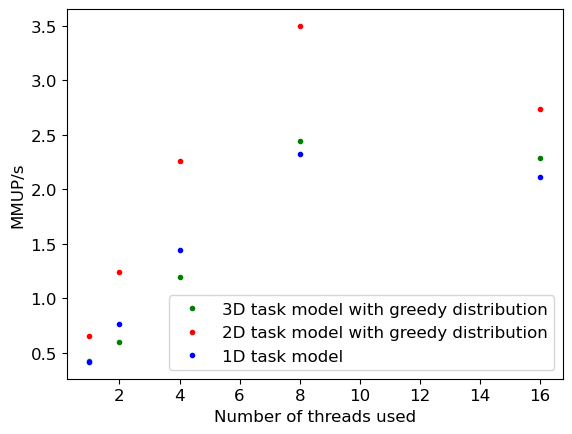

In [24]:
#Compare 3D with 2D with 1D
#Distro strategy greedy

fig, ax = plt.subplots()

ax.errorbar(
    xValues,
    mmups["threeDim"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="3D task model with greedy distribution"
)

ax.errorbar(
    xValues,
    mmups["twoDim"],
    #yerr = ,
    marker = '.',
    color ='red',
    markerfacecolor = 'red',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D task model with greedy distribution"
)
ax.errorbar(
    xValues,
    mmups["oneDim"],
    #yerr = ,
    marker = '.',
    color ='blue',
    markerfacecolor = 'blue',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="1D task model"
)

ax.set_xlabel("Number of threads used")
ax.set_ylabel("MMUP/s")

ax.legend()
fig.savefig('taskDimComp.pdf')
fig.savefig('taskDimComp.png')

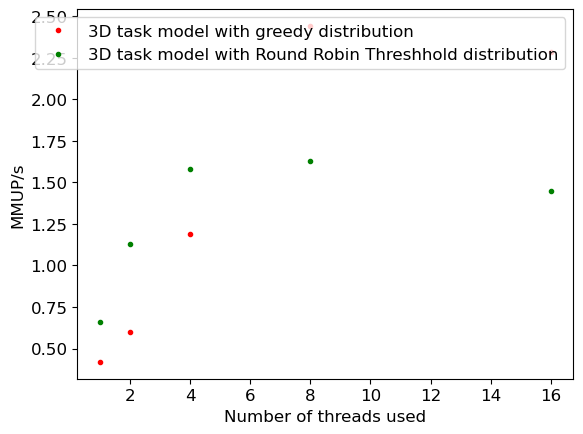

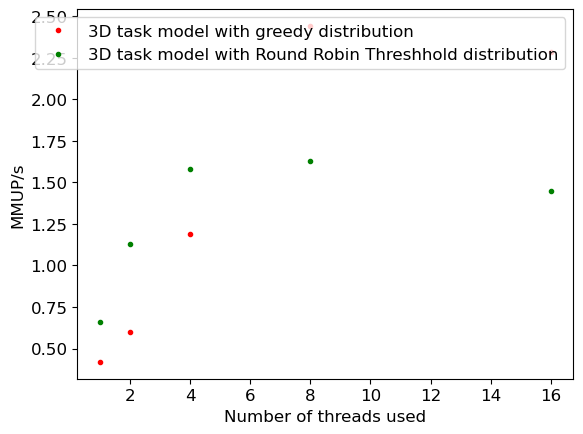

In [25]:
#Compare roundRobin with Greedy:
#three dimensional tasks

fig3d, ax3d = plt.subplots()

ax3d.errorbar(
    xValues,
    mmups["threeDim"],
    #yerr = ,
    marker = '.',
    color ='red',
    markerfacecolor = 'red',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="3D task model with greedy distribution"
)

ax3d.errorbar(
    xValues,
    mmups["threeDim-roundRobin"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="3D task model with Round Robin Threshhold distribution"
)

ax3d.set_xlabel("Number of threads used")
ax3d.set_ylabel("MMUP/s")

ax3d.legend()
fig3d.savefig('threeDimDistroComp.pdf')
fig3d.savefig('threeDimDistroComp.png')
fig3d

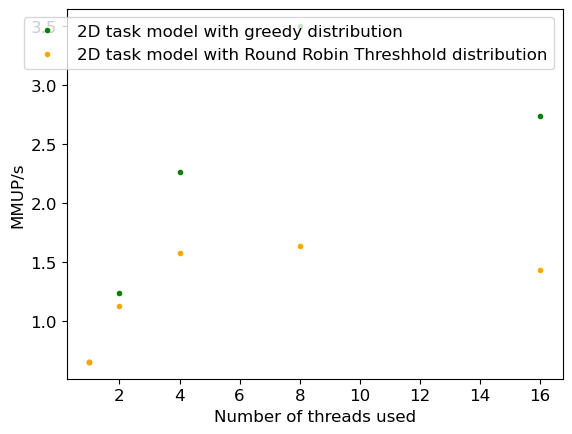

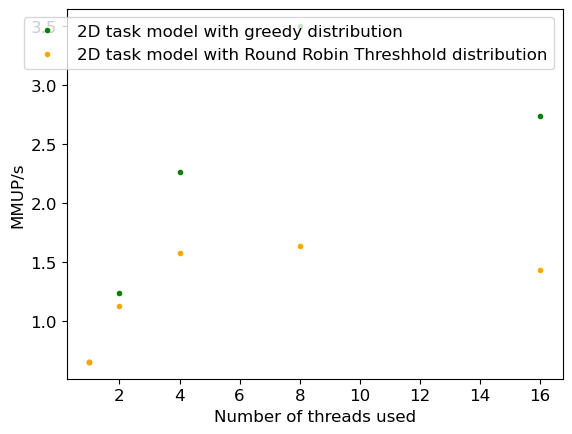

In [26]:
#Compare roundRobin with Greedy:
#two dimensional tasks

fig2d, ax2d = plt.subplots()

ax2d.errorbar(
    xValues,
    mmups["twoDim"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D task model with greedy distribution"
)

ax2d.errorbar(
    xValues,
    mmups["twoDim-roundRobin"],
    #yerr = ,
    marker = '.',
    color ='orange',
    markerfacecolor = 'orange',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D task model with Round Robin Threshhold distribution"
)

ax2d.set_xlabel("Number of threads used")
ax2d.set_ylabel("MMUP/s")

ax2d.legend()
fig2d.savefig('twoDimDistroComp.pdf')
fig2d.savefig('twoDimDistroComp.png')
fig2d

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


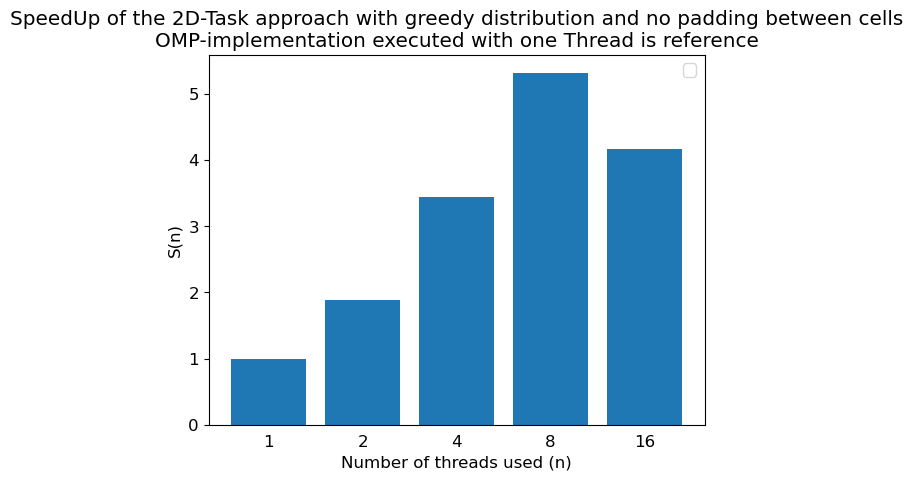

In [27]:
#speedup 2D, Greedy, omp as comparison
figTester, axTester = plt.subplots()

axTester.bar(np.arange(len(xValues)), speedUpsNoOmpComp['twoDim'], align='center')
axTester.set_xticks([0,1,2,3,4],xValues)
axTester.set_ylabel('S(n)')
axTester.set_xlabel('Number of threads used (n)')
axTester.set_title('SpeedUp of the 2D-Task approach with greedy distribution and no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
axTester.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

axTester.legend()
figTester.savefig('speedup_2D_omp_comp.pdf')
figTester.savefig('speedup_2D_omp_comp.png')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


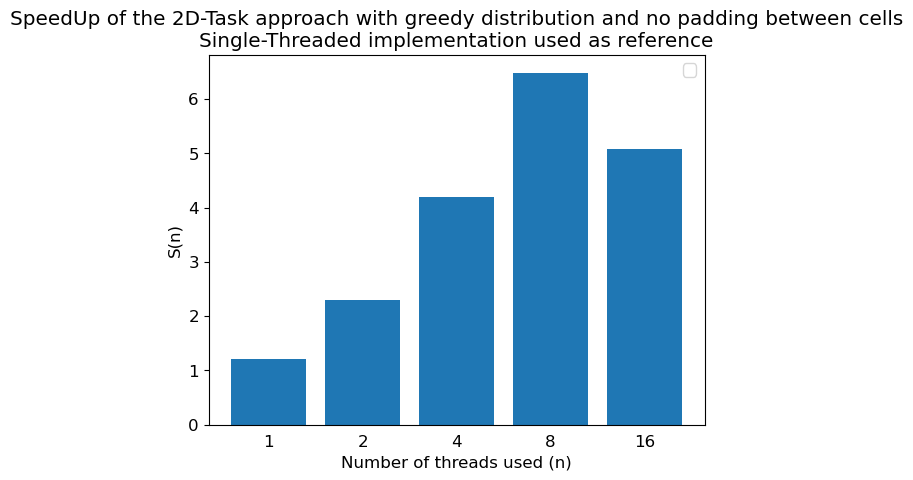

In [28]:
#speedup 2D, Greedy, single threaded as comparison
figTester, axTester = plt.subplots()


axTester.bar(np.arange(len(xValues)), speedUpsSingleTComp['twoDim'], align='center')
axTester.set_xticks([0,1,2,3,4],xValues)
axTester.set_ylabel('S(n)')
axTester.set_xlabel('Number of threads used (n)')
axTester.set_title('SpeedUp of the 2D-Task approach with greedy distribution and no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
axTester.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

axTester.legend()
figTester.savefig('speedup_2D_st_comp.pdf')
figTester.savefig('speedup_2D_st_comp.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


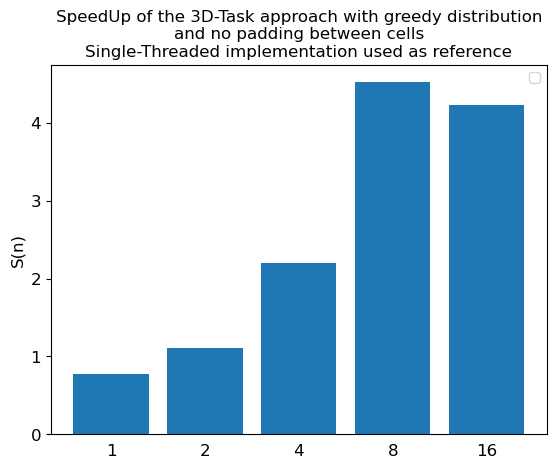

In [29]:
#speedup 3D, Greedy, single threaded as comparison
fig3dSp, ax3dSp = plt.subplots()

plt.rcParams.update({'font.size': 10})

ax3dSp.bar(np.arange(len(xValues)), speedUpsSingleTComp['threeDim'], align='center')
ax3dSp.set_xticks([0,1,2,3,4],xValues)
ax3dSp.set_ylabel('S(n)')
ax3dSp.set_title('SpeedUp of the 3D-Task approach with greedy distribution\nand no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax3dSp.legend()
fig3dSp.savefig('speedup_3D_st_comp.pdf')
fig3dSp.savefig('speedup_3D_st_comp.png')

plt.rcParams.update({'font.size': 12})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


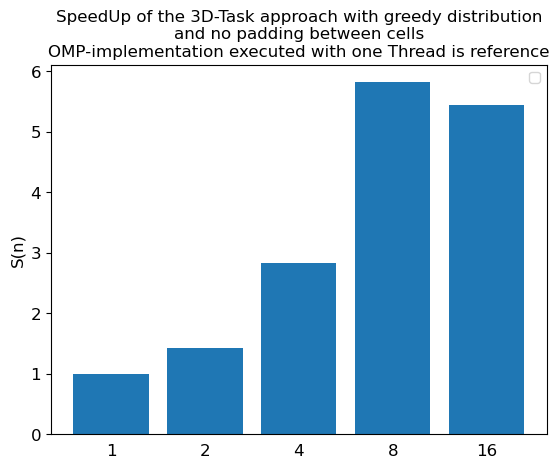

In [30]:
#speedup 3D, Greedy, omp as comparison
fig3dSp, ax3dSp = plt.subplots()

plt.rcParams.update({'font.size': 10})

ax3dSp.bar(np.arange(len(xValues)), speedUpsNoOmpComp['threeDim'], align='center')
ax3dSp.set_xticks([0,1,2,3,4],xValues)
ax3dSp.set_ylabel('S(n)')
ax3dSp.set_title('SpeedUp of the 3D-Task approach with greedy distribution\nand no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax3dSp.legend()
fig3dSp.savefig('speedup_3D_omp_comp.pdf')
fig3dSp.savefig('speedup_3D_omp_comp.png')

plt.rcParams.update({'font.size': 12})


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


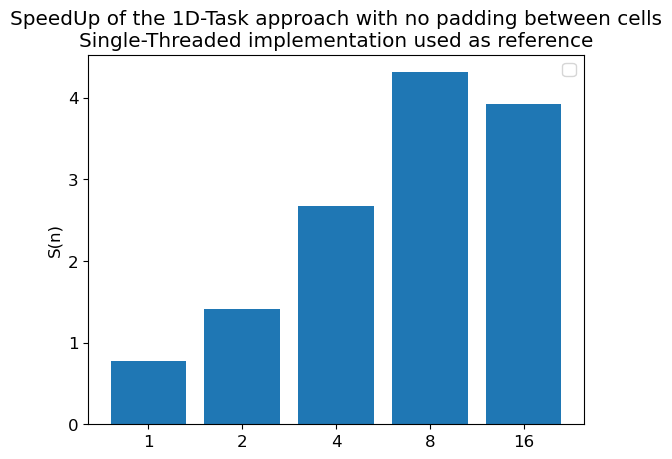

In [31]:
#speedup 1D, Single Threaded as comparison
fig1dSp, ax1dSp = plt.subplots()

ax1dSp.bar(np.arange(len(xValues)), speedUpsSingleTComp['oneDim'], align='center')
ax1dSp.set_xticks([0,1,2,3,4],xValues)
ax1dSp.set_ylabel('S(n)')
ax1dSp.set_title('SpeedUp of the 1D-Task approach with no padding between cells\nSingle-Threaded implementation used as reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax1dSp.legend()
fig1dSp.savefig('speedup_1D_st_comp.pdf')
fig1dSp.savefig('speedup_1D_st_comp.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


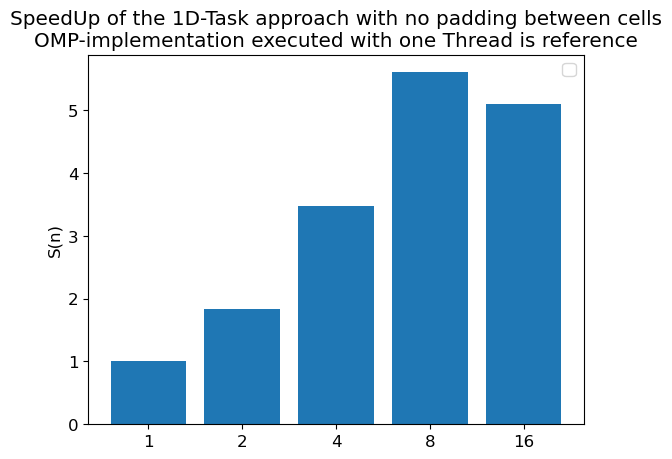

In [32]:
#speedup 1D, Omp as comparison
fig1dSp, ax1dSp = plt.subplots()

ax1dSp.bar(np.arange(len(xValues)), speedUpsNoOmpComp['oneDim'], align='center')
ax1dSp.set_xticks([0,1,2,3,4],xValues)
ax1dSp.set_ylabel('S(n)')
ax1dSp.set_title('SpeedUp of the 1D-Task approach with no padding between cells\nOMP-version executed with one Thread is reference')
# Striche auf x-Achse ausschalten
ax3dSp.tick_params(
    axis='x',
    which='both', #major und minor ticks
    bottom=False  # ticks auf der x-Achse (unten)
)

ax1dSp.legend()
fig1dSp.savefig('speedup_1D_omp_comp.pdf')
fig1dSp.savefig('speedup_1D_omp_comp.png')

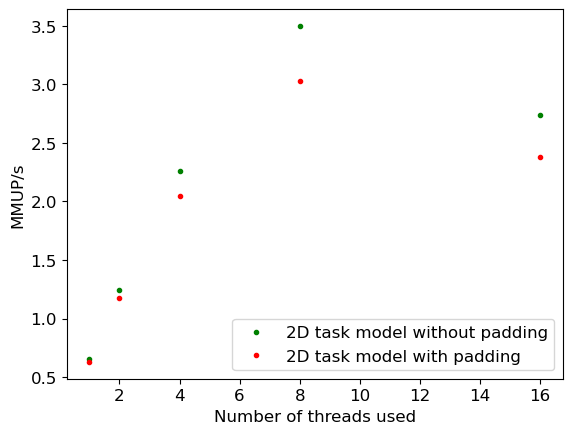

In [33]:
#The cost of padding, 2D approach

#Compare roundRobin with Greedy:
#two dimensional tasks

fig2d, ax2d = plt.subplots()

ax2d.errorbar(
    xValues,
    mmups["twoDim"],
    #yerr = ,
    marker = '.',
    color ='green',
    markerfacecolor = 'green',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D greedy task model without padding"
)

ax2d.errorbar(
    xValues,
    mmupsPadding["twoDim"],
    #yerr = ,
    marker = '.',
    color ='Red',
    markerfacecolor = 'Red',
    linestyle = '',
    elinewidth= 0.5,
    capsize = 1.5,
    label="2D greedy task model with padding"
)

ax2d.set_xlabel("Number of threads used")
ax2d.set_ylabel("MMUP/s")

ax2d.legend()
fig2d.savefig('2DPaddingComp.pdf')
fig2d.savefig('2DPaddingComp.png')